## Sounddevice

python-sounddevice allows you to record audio from your microphone and store it as a NumPy array.

This is a handy datatype for sound processing that can be converted to WAV format for storage using the scipy.io.wavfile module.

In [1]:
import sounddevice as sd
from scipy.io.wavfile import write, read
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import correlate
from IPython.display import Audio
%matplotlib inline



fs = 44100  # Sample rate
seconds = 3  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output.wav', fs, myrecording)  # Save as WAV file 

Methods for generating channel response

1. Play impulse file (e.g. 10-20 frames long, rest are zeros)
    - Generate the burst white noise with python 
    - Transmit the wav file to phone and play the audio file on phone, record the transmitted audio with python
    - 
2. Compare auto & cross-correlation functions

$$
    r_{XY}(\tau) = h(\tau) \star r_{XX}(\tau) \quad \rightarrow^{\textrm{F.T.}} \quad S_{XY}(\tau) = H(\tau) S_X(\tau)
$$



### 1. Generate a burst white noise

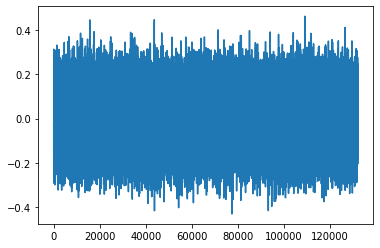

In [24]:
fs = 44100  # Sample rate
seconds = 3  # Duration

# Mean, Standard Deviation, num_samples
noise = np.random.normal(0,0.1, fs*seconds)
plt.plot(noise)

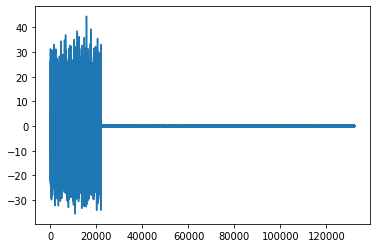

In [25]:
# Amplify the initial part of the audio
# to create an impulse/burst
impulse = 0.5 # length of impulse in second
Burst_noise = noise
Burst_noise[0:int(impulse * fs)] = 100 *  noise[0: int(impulse * fs)]
plt.plot(Burst_noise)

In [26]:
# Save the numpy as wav audio file
write('test_noise.wav', fs, Burst_noise)

### 2. Record the burst noise from phone playback

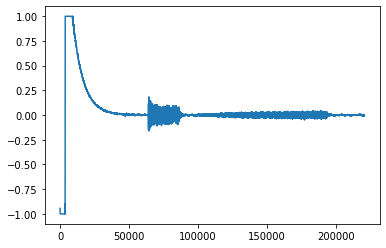

In [33]:
seconds = 5  # Use a slightly longer duration for recording and trim afterwards

recording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished
write('received_noise.wav', fs, recording)  # Save as WAV file 
plt.plot(recording)

### 3.0 Trim the audio 

In [ ]:
### Todo: Automatically trim the audio

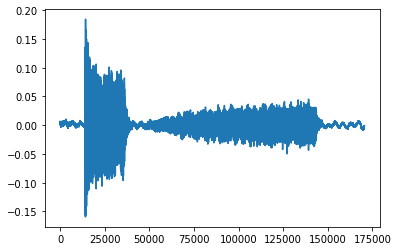

In [65]:
### Manually trim the audio:
trim = np.arange(0,50000)
receive = np.delete(recording, trim)
plt.plot(receive)

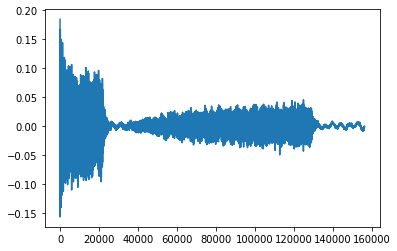

In [68]:
receive = np.delete(receive, np.arange(0, np.argmax(receive > 0.15)))
plt.plot(receive)

### 3.1 Take the first 3 seconds of audio file

In [71]:
trimmed_receive = receive[0:(len(Burst_noise))]
# Check the length of the transmitted and received
print(len(trimmed_receive),len(Burst_noise))

132300 132300


### 4 Normalise the transimitted and received audio

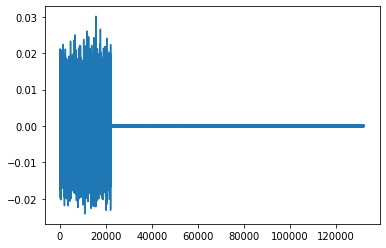

In [72]:
normalised_tran = Burst_noise / np.linalg.norm(Burst_noise)
plt.plot(normalised_tran)

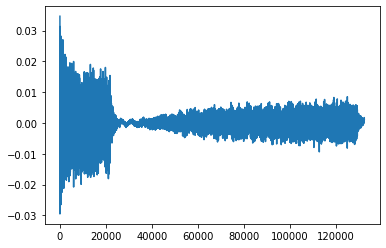

In [73]:
normalised_rece = trimmed_receive / np.linalg.norm(trimmed_receive)
plt.plot(normalised_rece)